# Welcome to project Dionysus!

You were given the challenge of building code that can aggreagte and analyse wine production from many producers.  
Since you want to learn more about wine and automating processes, you accept.

You are given three datasets, [Almeirim.csv](Almeirim.csv), [Benavente.csv](Benavente.csv), and [Cartaxo.csv](Cartaxo.csv)
representing monthly wine bottling output from three small to medium producers.

The data represents historical **monthly** output in thousands of litters, but rough estimates for output.

**All datasets comprise the same time interval!**

These three datasets represent a subset of the **thousands** of datasets you will have to analyse in the future project. **HOWEVER**, these 3 datasets represent the 3 unique configurations for all future dataset analysis.

If your analysis works for these 3, it will work for all future datasets.

To better prepare for future analysis you decide to develop some code to speed things up.

## The Analysis

### Exploration
1. What is the combination of directives and characters that allows you to read the Almeirim.csv item that has temporal information?
1. And for Benavente.csv?
2. And for Cartaxo.csv?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from statsmodels.tsa.statespace.sarimax import SARIMAX
import glob

In [5]:
df_a = pd.read_csv('Almeirim.csv')
df_a.head()

,date,output
0,85-01,72.5052
1,85-02,70.6720
2,85-03,62.4502
3,85-04,57.4714
4,85-05,55.3151


In [4]:
df_b = pd.read_csv('Benavente.csv')
df_b.head()

,date,output
0,"Jan,1985",99.178372
1,"Feb,1985",96.736512
2,"Mar,1985",85.540669
3,"Apr,1985",78.774726
4,"May,1985",75.870978


In [6]:
df_c = pd.read_csv('Cartaxo.csv')
df_c.head()

,date,output
0,85-01,60.421000
1,85-02,59.042242
2,85-03,52.305336
3,85-04,48.257036
4,85-05,46.563892


In [7]:
#transforming the data in datetime
almeirim_df = pd.read_csv('Almeirim.csv', parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%y-%m'))
cartaxo_df = pd.read_csv('Cartaxo.csv', parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%y-%m'))

In [8]:
almeirim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    396 non-null    datetime64[ns]
 1   output  396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [9]:
cartaxo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    396 non-null    datetime64[ns]
 1   output  396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [11]:
benavente_df = pd.read_csv('Benavente.csv', parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%b,%Y'))

In [12]:
class Wine:
    """
    A class to facilitate analysis of wine production data.

    Attributes
    ----------
    data : pd.DataFrame
        A dataframe containing the wine production data.
    producer : str
        The name of the wine producer.
    
    Modules
    -------
    __init__(self, data, producer)
        Constructor for the Wine class.
    """
    def __init__(self, data, producer):
        """
        Initializes the Wine object with data and a producer name.
        """
        self.data = data
        self.producer = producer

#### Initializing
When initialized, the class must have as arguments:
1. A __filename__ parameter, without a default argument.
1. A __label__ parameter with a default value of "Producer".
1. Make sure the former two arguments are stored as attributes of the class.
1. Check if the path to __filename__ exists. If it does, it should be stored as and attribute called __df__, which should be a pandas dataframe. If it is not found, the code should __raise__ a _FileNotFoundError_ with an appropriate message.

In [13]:
class Wine:
    """
    A class to facilitate analysis of wine production data with automatic date parsing.

    Attributes
    ----------
    filename : str
        The path to the CSV file containing the wine production data.
    label : str
        A label for the producer.
    df : pd.DataFrame
        A dataframe containing the wine production data, loaded from the specified file.

    Methods
    -------
    __init__(self, filename, label="Producer")
        Constructor for the Wine class that loads data from a specified CSV file with automatic date parsing.
    """
    def __init__(self, filename, label="Producer"):
        """
        Initializes the Wine object, loading wine production data from a CSV file with automatic date parsing.
        
        Parameters
        ----------
        filename : str
            The path to the CSV file containing the wine production data.
        label : str, optional
            A label for the producer. Default is "Producer".
        
        Raises
        ------
        FileNotFoundError
            If the specified file cannot be found.
        """
        self.filename = filename
        self.label = label

        # Check if the file exists
        if not os.path.exists(self.filename):
            raise FileNotFoundError(f"The file {self.filename} does not exist.")
        
        # Attempt to load and parse the file with different date formats
        try:
            self.df = pd.read_csv(self.filename, parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%y-%m'))
        except ValueError:
            try:
                self.df = pd.read_csv(self.filename, parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%b,%Y'))
            except ValueError:
                try:
                    self.df = pd.read_csv(self.filename, parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m'))
                except ValueError:
                    raise ValueError("Date format in the file does not match any of the expected formats.")


In [18]:
#check the date format
test_wine = Wine('Almeirim.csv')
test_wine.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    396 non-null    datetime64[ns]
 1   output  396 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


#### Report
Write a __report__ method to analyze data and create a report.
1. The method should have a __start_date__ argument with a default value of "1990-01-01".
1. The method should have an __end_date__ argument with a default value of "2018-01-01".
1. If __start_date__ or __end_date__ are not of type string, raise a TypeError with message "Both temporal arguments must be strings".
1. If __start_date__ or __end_date__ don't have a length of 10, raise an Exception with message "Both arguments must have length 10."
1. If you try to convert __start_date__ to a temporal format and you fail, raise an Exception with message "Can't convert start_date to temporal format"
1. If you try to convert __end_date__ to a temporal format and you fail, raise an Exception with message "Can't convert end_date to temporal format"
1. The method should __print__ a __description__ of the dataframe, filtered between __start_date__ and __end_date__.
1. Write a one line docstring for the method.

In [15]:
class Wine:
    """
    A class designed to expedite and scale wine production data analysis.

    Attributes
    ----------
    filename : str
        The path to the CSV file containing the wine production data.
    label : str
        A label for the producer.
    df : pd.DataFrame
        A dataframe containing the wine production data, loaded from the specified file.

    Methods
    -------
    __init__(self, filename, label="Producer")
        Initializes the Wine object, loading data from a CSV file.
        
    report(self, start_date, end_date)
        Generates a report of wine production data within a specified date range.
    """
    def __init__(self, filename, label="Producer"):
        """
        Initializes the Wine object, loading wine production data from a CSV file with automatic date parsing.
        
        Parameters
        ----------
        filename : str
            The path to the CSV file containing the wine production data.
        label : str, optional
            A label for the producer. Default is "Producer".
        
        Raises
        ------
        FileNotFoundError
            If the specified file cannot be found.
        """
        self.filename = filename
        self.label = label

        # Check if the file exists
        if not os.path.exists(self.filename):
            raise FileNotFoundError(f"The file {self.filename} does not exist.")
        
        # Attempt to load and parse the file with different date formats
        try:
            self.df = pd.read_csv(self.filename, parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%y-%m'))
        except ValueError:
            try:
                self.df = pd.read_csv(self.filename, parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%b,%Y'))
            except ValueError:
                try:
                    self.df = pd.read_csv(self.filename, parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m'))
                except ValueError:
                    raise ValueError("Date format in the file does not match any of the expected formats.")

    def report(self, start_date="1990-01-01", end_date="2018-01-01"):
        """
        Generates a report of the wine production data within a specified date range.
        """
        # Validate argument types
        if not isinstance(start_date, str) or not isinstance(end_date, str):
            raise TypeError("Both temporal arguments must be strings")
        
        # Validate argument lengths
        if len(start_date) != 10 or len(end_date) != 10:
            raise Exception("Both arguments must have length 10.")
        
        try:
            start_date_parsed = pd.to_datetime(start_date)
        except:
            raise Exception("Can't convert start_date to temporal format")
        
        try:
            end_date_parsed = pd.to_datetime(end_date)
        except:
            raise Exception("Can't convert end_date to temporal format")
        
        # Filter the dataframe within the specified date range
        filtered_df = self.df[(self.df['date'] >= start_date_parsed) & (self.df['date'] <= end_date_parsed)]
        
        # Print a description of the filtered dataframe
        print(filtered_df.describe())

### Forecast
Since you want to see into the future, you make a forecast method using a **SARIMAX** from [statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html).
1. Define a forecast method with two arguments: a __start_date__ with default value '2018-01-01' and a **periods** with a default value 24.
2. Declare a variable **mod** and make it equal to a SARIMAX object with 3 parameters: the column 'output' of the dataframe (self.df), *order* set to (2,1,1) and *seasonal_order* set to (1,1,1,12), because we have yearly repetition.
3. Declare a variable **res** equal to the result of the ".fit" method from **mod**.
4. Declare a variable called **output_hat** equal to the prediction (res.predict) with two parameters: the length of the dataframe and the length of the dataframe plus the **periods-1** (to get dimensions right).
5. Declare a variable called **time_hat** equal to a pandas daterange with *start* as __start_date__, *periods* as __periods__ and **freq** to the start of the month, 'MS'.
6.  Make a dataframe called **df_pred** with **time_hat** and **output_hat** as columns.
7.  Plot both self.df and df_pred.

In [16]:
class Wine:
    """
    A class designed to expedite and scale wine production data analysis.

    Attributes
    ----------
    filename : str
        The path to the CSV file containing the wine production data.
    label : str
        A label for the producer.
    df : pd.DataFrame
        A dataframe containing the wine production data, loaded from the specified file.

    Methods
    -------
    __init__(self, filename, label="Producer")
        Initializes the Wine object, loading data from a CSV file.
        
    report(self, start_date, end_date)
        Generates a report of wine production data within a specified date range.

    forecast(self, start_date='2018-01-01', periods=24)
        Forecasts future wine production using a SARIMAX model. 
        Sets up and fits the model to the existing data, predicts. 
        future values for a specified number of periods starting from a given date, 
        and plots the historical and forecasted production data.
    """
    def __init__(self, filename, label="Producer"):
        """
        Initializes the Wine object, loading wine production data from 
        a CSV file with automatic date parsing.
        
        Parameters
        ----------
        filename : str
            The path to the CSV file containing the wine production data.
        label : str, optional
            A label for the producer. Default is "Producer".
        
        Raises
        ------
        FileNotFoundError
            If the specified file cannot be found.
        """
        self.filename = filename
        self.label = label
        # Check if the file exists
        if not os.path.exists(self.filename):
            raise FileNotFoundError(f"The file {self.filename} does not exist.")
        # Attempt to load and parse the file with different date formats
        try:
            self.df = pd.read_csv(self.filename, parse_dates=['date'], 
                                  date_parser=lambda x: pd.to_datetime(x, format='%y-%m'))
        except ValueError:
            try:
                self.df = pd.read_csv(self.filename, parse_dates=['date'],
                                      date_parser=lambda x: pd.to_datetime(x, format='%b,%Y'))
            except ValueError:
                try:
                    self.df = pd.read_csv(self.filename, parse_dates=['date'],
                                          date_parser=lambda x: pd.to_datetime(x, format='%Y-%m'))
                except ValueError:
                    raise ValueError("Date format in the file does not match the expected formats.")

    def report(self, start_date="1990-01-01", end_date="2018-01-01"):
        """
        Generates a report of the wine production data within a specified date range.
        """
        # Validate argument types
        if not isinstance(start_date, str) or not isinstance(end_date, str):
            raise TypeError("Both temporal arguments must be strings")
        # Validate argument lengths
        if len(start_date) != 10 or len(end_date) != 10:
            raise ValueError("Both arguments must have length 10.")
        try:
            start_date_parsed = pd.to_datetime(start_date)
        except ValueError:
            raise ValueError("Can't convert start_date to temporal format")
        try:
            end_date_parsed = pd.to_datetime(end_date)
        except ValueError:
            raise ValueError("Can't convert end_date to temporal format")
        
        # Filter the dataframe within the specified date range
        filtered_df = self.df[(self.df['date'] >= start_date_parsed) 
                              & (self.df['date'] <= end_date_parsed)]
        # Print a description of the filtered dataframe
        print(filtered_df.describe())

    def forecast(self, start_date='2018-01-01', periods=24):
        """
        Forecasts future wine production using SARIMAX model.
        
        Parameters
        ----------
        start_date : str, optional
            The start date for forecasting. Default is '2018-01-01'.
        periods : int, optional
            The number of periods to forecast. Default is 24.
        """
        # Setup the SARIMAX model
        mod = SARIMAX(self.df['output'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
        
        # Fit the model
        try:
            res = mod.fit()
        except Exception as exc:
            raise ValueError(f"Error fitting SARIMAX model: {exc}") from exc
        # Predict future values
        try:
            output_hat = res.predict(start=len(self.df), end=len(self.df) + periods - 1)
        except Exception as exc:
            raise ValueError(f"Error predicting future values: {exc}") from exc
        
        # Create a date range for the predictions
        time_hat = pd.date_range(start=start_date, periods=periods, freq='MS')
        
        # Create a DataFrame for the predicted values
        df_pred = pd.DataFrame({'date': time_hat, 'output': output_hat}).set_index('date')
        # Plot historical and forecasted data
        plt.figure(figsize=(10, 6))
        plt.plot(self.df['date'], self.df['output'], label='Historical')
        plt.plot(df_pred.index, df_pred['output'], label='Forecast', linestyle='--')
        plt.legend()
        plt.title('Wine Production Forecast')
        plt.xlabel('Date')
        plt.ylabel('Output')
        plt.show()

### Deploy 
We want to run our class for all files we might encounter in the future, not just the ones in the exercise.

1. Outside of the class definition, build a list of all the __.csv__ files you have in your current directory. Not manually, make sure you find a python way to do it automatically.
2. Make a **for** cycle where you iterate over every file in the list.
3. Extract the name of the producer from the filename (everything before _.csv_) and store it in a variable called __label__.
4. Declare a class instance of __Wine__ called __winemaker__. The arguments should be the __filename__ you are listing over and the __label__ you just declared. 

Generating report for Almeirim:
           output
count  336.000000
mean    92.726822
std     12.736687
min     65.821800
25%     83.990550
50%     92.069600
75%    102.169900
max    124.254900
Forecasting production for Almeirim:
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31014D+00    |proj g|=  9.01249D-02


 This problem is unconstrained.



At iterate    5    f=  2.26598D+00    |proj g|=  4.32189D-02

At iterate   10    f=  2.23323D+00    |proj g|=  2.49904D-02

At iterate   15    f=  2.21855D+00    |proj g|=  3.44111D-03

At iterate   20    f=  2.21851D+00    |proj g|=  2.92366D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   2.924D-06   2.219D+00
  F =   2.2185088647370770     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


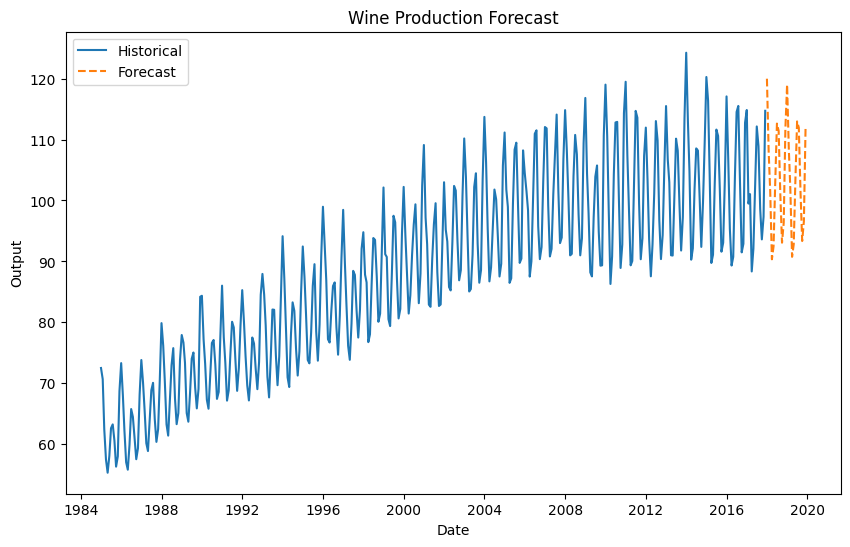

Generating report for Cartaxo:
           output
count  336.000000
mean   144.759712
std     49.908290
min     64.472946
25%    101.435322
50%    142.151281
75%    182.889234
max    259.215050
Forecasting production for Cartaxo:
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83829D+00    |proj g|=  6.34746D-02


 This problem is unconstrained.



At iterate    5    f=  2.80756D+00    |proj g|=  6.25736D-02

At iterate   10    f=  2.76360D+00    |proj g|=  3.24816D-02

At iterate   15    f=  2.75239D+00    |proj g|=  2.88529D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   1.412D-06   2.752D+00
  F =   2.7523839938605468     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


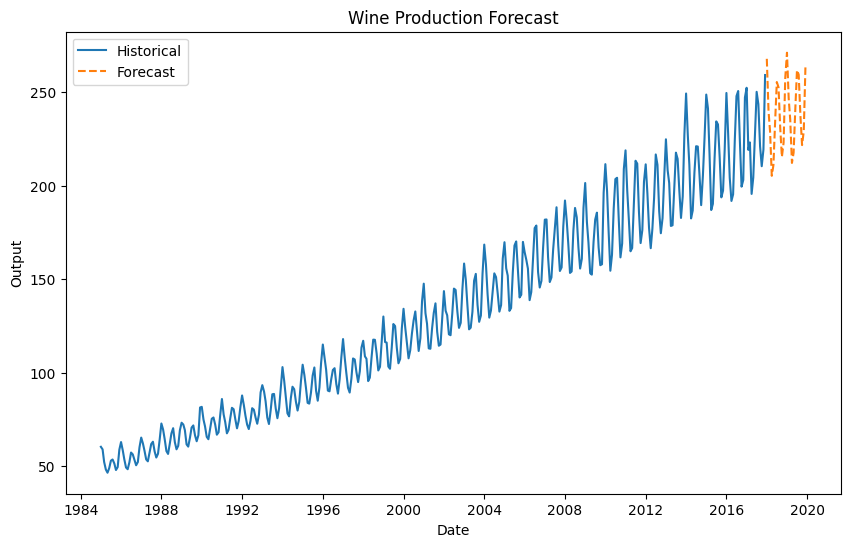

/var/folders/51/kvxxh0pn2p9g4w8qy0z706n40000gn/T/ipykernel_85420/2781102553.py:52: FutureWarning: 
        Use pd.to_datetime instead.

  self.df = pd.read_csv(self.filename, parse_dates=['date'],
 This problem is unconstrained.


Generating report for Benavente:
           output
count  336.000000
mean   156.631769
std     33.688985
min     94.283726
25%    128.544381
50%    156.591157
75%    182.540661
max    234.325610
Forecasting production for Benavente:
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84851D+00    |proj g|=  4.62468D-02

At iterate    5    f=  2.81032D+00    |proj g|=  4.96578D-02

At iterate   10    f=  2.77384D+00    |proj g|=  6.69949D-02

At iterate   15    f=  2.75628D+00    |proj g|=  5.35625D-03

At iterate   20    f=  2.75605D+00    |proj g|=  2.41143D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the f

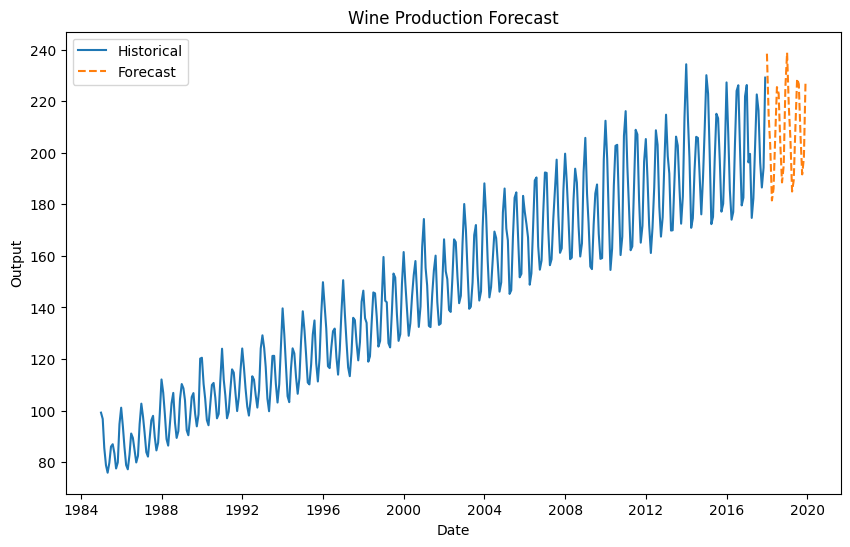

In [17]:
# List all .csv files in the current directory
csv_files = glob.glob('*.csv')

# Iterate over each file in the list
for filename in csv_files:
    # Extract the name of the producer from the filename (everything before .csv)
    label = os.path.basename(filename).split('.')[0]
    
    # Declare a class instance of Wine called winemaker
    winemaker = Wine(filename=filename, label=label)
    
    # Generate a report for the producer
    print(f"Generating report for {label}:")
    winemaker.report() 
    
    print(f"Forecasting production for {label}:")
    winemaker.forecast() 

class Wine:
    """
    A class designed to expedite and scale wine production data analysis.

    Attributes
    ----------
    filename : str
        The path to the CSV file containing the wine production data.
    label : str
        A label for the producer.
    df : pd.DataFrame
        A dataframe containing the wine production data, loaded from the specified file.

    Methods
    -------
    __init__(self, filename, label="Producer")
        Initializes the Wine object, loading data from a CSV file.
        
    report(self, start_date, end_date)
        Generates a report of wine production data within a specified date range.

    forecast(self, start_date='2018-01-01', periods=24)
        Forecasts future wine production using a SARIMAX model. 
        Sets up and fits the model to the existing data, predicts. 
        future values for a specified number of periods starting from a given date, 
        and plots the historical and forecasted production data.
    """
    def __init__(self, filename, label="Producer"):
        """
        Initializes the Wine object, loading wine production data from 
        a CSV file with automatic date parsing.
        
        Parameters
        ----------
        filename : str
            The path to the CSV file containing the wine production data.
        label : str, optional
            A label for the producer. Default is "Producer".
        
        Raises
        ------
        FileNotFoundError
            If the specified file cannot be found.
        """
        self.filename = filename
        self.label = label
        # Check if the file exists
        if not os.path.exists(self.filename):
            raise FileNotFoundError(f"The file {self.filename} does not exist.")
        # Attempt to load and parse the file with different date formats
        try:
            self.df = pd.read_csv(self.filename, parse_dates=['date'], 
                                  date_parser=lambda x: pd.to_datetime(x, format='%y-%m'))
        except ValueError:
            try:
                self.df = pd.read_csv(self.filename, parse_dates=['date'],
                                      date_parser=lambda x: pd.to_datetime(x, format='%b,%Y'))
            except ValueError:
                try:
                    self.df = pd.read_csv(self.filename, parse_dates=['date'],
                                          date_parser=lambda x: pd.to_datetime(x, format='%Y-%m'))
                except ValueError:
                    raise ValueError("Date format in the file does not match the expected formats.")

    def report(self, start_date="1990-01-01", end_date="2018-01-01"):
        """
        Generates a report of the wine production data within a specified date range.
        """
        # Validate argument types
        if not isinstance(start_date, str) or not isinstance(end_date, str):
            raise TypeError("Both temporal arguments must be strings")
        # Validate argument lengths
        if len(start_date) != 10 or len(end_date) != 10:
            raise ValueError("Both arguments must have length 10.")
        try:
            start_date_parsed = pd.to_datetime(start_date)
        except ValueError:
            raise ValueError("Can't convert start_date to temporal format")
        try:
            end_date_parsed = pd.to_datetime(end_date)
        except ValueError:
            raise ValueError("Can't convert end_date to temporal format")
        
        # Filter the dataframe within the specified date range
        filtered_df = self.df[(self.df['date'] >= start_date_parsed) 
                              & (self.df['date'] <= end_date_parsed)]
        # Print a description of the filtered dataframe
        print(filtered_df.describe())

    def forecast(self, start_date='2018-01-01', periods=24):
        """
        Forecasts future wine production using SARIMAX model.
        
        Parameters
        ----------
        start_date : str, optional
            The start date for forecasting. Default is '2018-01-01'.
        periods : int, optional
            The number of periods to forecast. Default is 24.
        """
        # Setup the SARIMAX model
        mod = SARIMAX(self.df['output'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
        
        # Fit the model
        try:
            res = mod.fit()
        except Exception as exc:
            raise ValueError(f"Error fitting SARIMAX model: {exc}") from exc
        # Predict future values
        try:
            output_hat = res.predict(start=len(self.df), end=len(self.df) + periods - 1)
        except Exception as exc:
            raise ValueError(f"Error predicting future values: {exc}") from exc
        
        # Create a date range for the predictions
        time_hat = pd.date_range(start=start_date, periods=periods, freq='MS')
        
        # Create a DataFrame for the predicted values
        df_pred = pd.DataFrame({'date': time_hat, 'output': output_hat}).set_index('date')
        # Plot historical and forecasted data
        plt.figure(figsize=(10, 6))
        plt.plot(self.df['date'], self.df['output'], label='Historical')
        plt.plot(df_pred.index, df_pred['output'], label='Forecast', linestyle='--')
        plt.legend()
        plt.title('Wine Production Forecast')
        plt.xlabel('Date')
        plt.ylabel('Output')
        plt.show()